In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_df = pd.read_csv("/kaggle/input/siim-isic-melanoma-classification/train.csv")
test_df = pd.read_csv("/kaggle/input/siim-isic-melanoma-classification/test.csv")

In [3]:
train_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [4]:
test_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [5]:
print("Class count for training dataset \n",pd.Index(train_df['benign_malignant']).value_counts())

Class count for training dataset 
 benign       32542
malignant      584
Name: benign_malignant, dtype: int64


In [6]:
train_df.isna().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64

In [7]:
train_df.patient_id.nunique()

2056

In [8]:
train_df['target'].value_counts()

0    32542
1      584
Name: target, dtype: int64

In [9]:
train_df['anatom_site_general_challenge'].value_counts()

torso              16845
lower extremity     8417
upper extremity     4983
head/neck           1855
palms/soles          375
oral/genital         124
Name: anatom_site_general_challenge, dtype: int64

In [10]:
train_df['diagnosis'].value_counts()

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
atypical melanocytic proliferation        1
cafe-au-lait macule                       1
Name: diagnosis, dtype: int64

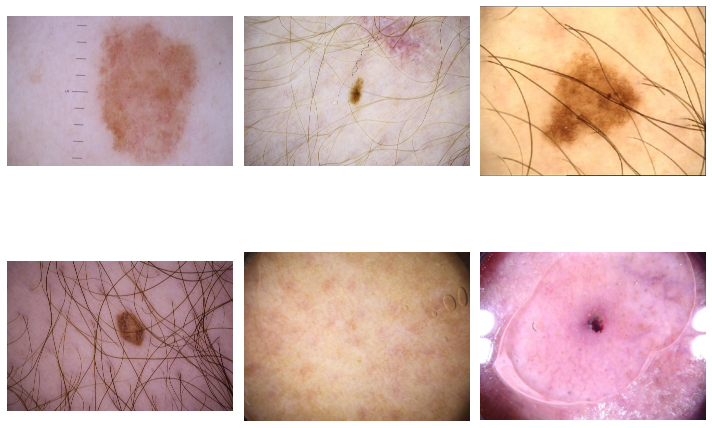

In [11]:
import random
IMAGE_PATH = "../input/siim-isic-melanoma-classification/"
images = train_df['image_name'].values
random_images = [np.random.choice(images+'.jpg') for i in range(6)]
img_dir = IMAGE_PATH+'/jpeg/train'
plt.figure(figsize=(10,8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()  

In [12]:
import pydicom
def show_dcm_info(dataset):
    print("Filename.........:", file_path)
    print("Storage type.....:", dataset.SOPClassUID)
    print()

    pat_name = dataset.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print("Patient's name......:", display_name)
    print("Patient id..........:", dataset.PatientID)
    print("Patient's Age.......:", dataset.PatientAge)
    print("Patient's Sex.......:", dataset.PatientSex)
    print("Modality............:", dataset.Modality)
    print("Body Part Examined..:", dataset.BodyPartExamined)
    
    if 'PixelData' in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(dataset.PixelData)))
        if 'PixelSpacing' in dataset:
            print("Pixel spacing....:", dataset.PixelSpacing)

In [13]:
def plot_pixel_array(dataset, figsize=(10,10)):
    plt.figure(figsize=figsize)
    plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
    plt.show()

Filename.........: ../input/siim-isic-melanoma-classification/train/ISIC_6531118.dcm
Storage type.....: "1.2.840.10008.5.1.4.1.1.77.1.4"

Patient's name......: "ISIC, 6531118"
Patient id..........: "ISIC_6531118"
Patient's Age.......: 025Y
Patient's Sex.......: F
Modality............: "XC"
Body Part Examined..: TORSO
Image size.......: 480 x 640, 56514 bytes


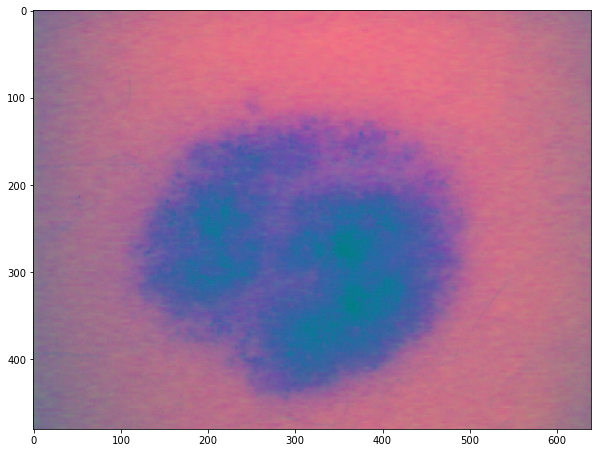

Filename.........: ../input/siim-isic-melanoma-classification/train/ISIC_8483799.dcm
Storage type.....: "1.2.840.10008.5.1.4.1.1.77.1.4"

Patient's name......: "ISIC, 8483799"
Patient id..........: "ISIC_8483799"
Patient's Age.......: 050Y
Patient's Sex.......: M
Modality............: "XC"
Body Part Examined..: TORSO
Image size.......: 1053 x 1872, 1459292 bytes


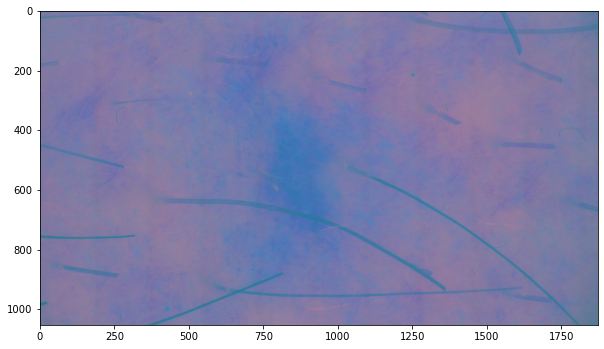

In [14]:
i = 1
num_to_plot = 2
for file_name in os.listdir('../input/siim-isic-melanoma-classification/train/'):
    file_path = os.path.join('../input/siim-isic-melanoma-classification/train/', file_name)
    dataset = pydicom.dcmread(file_path)
    show_dcm_info(dataset)
    plot_pixel_array(dataset)
    
    if i >= num_to_plot:
        break
    
    i += 1